In [74]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [49]:
# Note: To just read in part add nrows =
parseDates = ["Opened", "Closed", "Updated"] # Convert these to datetimes
street = pd.read_csv("Street_and_Sidewalk_Cleaning.csv", parse_dates=parseDates)
street.head()

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Neighborhood,Updated,Point
0,322566,2008-11-30 22:56:00,2009-07-21 16:24:00,Closed,DPW Ops Queue,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,Voice In,3.0,Nob Hill,2009-07-21 16:24:00,"(37.795328529, -122.418067787)"
1,322560,2008-11-30 22:24:00,2009-07-21 16:24:00,Closed,DPW Ops Queue,Intersection of TAYLOR ST and TURK ST,Street and Sidewalk Cleaning,Illegal_Dumping,Garbage,Voice In,6.0,Downtown/Civic Center,2009-07-21 16:24:00,"(37.7832142923006, -122.410764953722)"
2,322559,2008-11-30 22:20:00,2008-12-01 06:07:00,Closed,DPW Ops Queue,"1601 SACRAMENTO ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Illegal_Dumping,Mattress,Voice In,3.0,Nob Hill,2008-12-01 06:07:00,"(37.791643509125, -122.419260423291)"
3,322556,2008-11-30 21:34:00,2008-12-09 08:07:00,Closed,DPW Ops Queue,Intersection of 25TH ST and LUCKY ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Human_waste_or_urine,Voice In,9.0,Mission,2008-12-09 08:07:00,"(37.7509362479361, -122.413364630104)"
4,322545,2008-11-30 20:45:00,2009-02-03 07:09:00,Closed,DPW Ops Queue,Intersection of 19TH ST and OAKWOOD ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Empty_cart,Voice In,8.0,Mission,2009-02-03 07:09:00,"(37.7598935230725, -122.42486308879)"


Some basic statistics on the dataset we are starting with:

In [53]:
numRows = street.shape[0]
print "We are working with", numRows, "rows."
print "Our dates range from", street.loc[numRows - 1, "Opened"],"to", street.loc[0, "Opened"], "."

We are working with 747388 rows.
Our dates range from 2017-01-22 00:26:01 to 2008-11-30 22:56:00 .


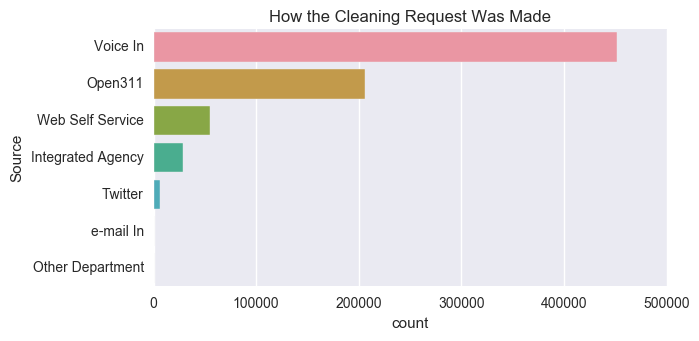

In [98]:
#plt.figure(figsize=(2,100)) # Doesn't do much
theOrder = ["Voice In", "Open311", "Web Self Service", "Integrated Agency", "Twitter", "e-mail In", "Other Department"]
#sns.set(font_scale = 1.5)
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(y = "Source", data = street, kind = "count", orient = "h", order = theOrder, aspect = 2)#, size = 10)
plt.title("How the Cleaning Request Was Made") 
plt.show()

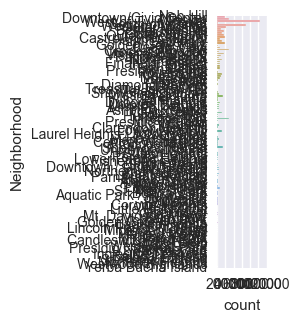

In [100]:
#plt.figure(figsize=(2,100)) # Doesn't do much
#theOrder = ["Voice In", "Open311", "Web Self Service", "Integrated Agency", "Twitter", "e-mail In", "Other Department"]
#sns.set(font_scale = 1.5)
#sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(y = "Neighborhood", data = street, kind = "count", orient = "h")# order = theOrder, aspect = 2)#, size = 10)
#plt.title("How the Cleaning Request Was Made") 
plt.show()

In [117]:
street.Neighborhood.unique()

array(['Nob Hill', 'Downtown/Civic Center', 'Mission',
       'West of Twin Peaks', 'South of Market', 'Western Addition',
       'Outer Mission', 'Bernal Heights', 'Russian Hill', 'Outer Sunset',
       'Outer Richmond', 'Castro/Upper Market', 'Haight Ashbury',
       'Excelsior', 'Golden Gate Park', 'Ocean View', 'Bayview',
       'Crocker Amazon', 'Inner Richmond', 'Visitacion Valley',
       'Pacific Heights', 'North Beach', 'Parkside', 'Financial District',
       'Inner Sunset', 'Marina', 'Twin Peaks', 'Presidio Heights',
       'Potrero Hill', 'Chinatown', 'Noe Valley', 'Lakeshore', 'Seacliff',
       'Glen Park', 'Diamond Heights', 'Presidio', nan,
       'Treasure Island/YBI', 'Telegraph Hill', 'Showplace Square',
       'Mission Dolores', 'Bret Harte', 'Panhandle', 'Duboce Triangle',
       'Dolores Heights', 'Mission Terrace', 'Polk Gulch',
       'Ashbury Heights', 'Civic Center', 'Cole Valley', 'Hunters Point',
       'Tenderloin', 'Mission Bay', 'Presidio Terrace', 'Castr